In [5]:

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load the Titanic dataset
df = pd.read_csv('/content/train.csv')

# Checking the first 5 rows to understand the structure
df.head()

# Checking basic information about the dataset: data types, null values, etc.
print("\nDataset Information:")
df.info()

# Getting basic statistical details like mean, median, min, max, etc.
print("\nStatistical Summary:")
df.describe()

# Checking the number of missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Checking the number of unique values for each feature
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())





Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary:

Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket          

In [6]:
# Checking how many passengers survived vs did not survive
print("\nSurvival Counts:")
print(df['Survived'].value_counts())

# Checking the distribution of passengers across different classes (1st, 2nd, 3rd)
print("\nPassenger Class Distribution:")
print(df['Pclass'].value_counts())

# Checking the gender distribution
print("\nGender Distribution:")
print(df['Sex'].value_counts())

# Checking the distribution based on port of embarkation
print("\nEmbarkation Port Distribution:")
print(df['Embarked'].value_counts())



Survival Counts:
Survived
0    549
1    342
Name: count, dtype: int64

Passenger Class Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Gender Distribution:
Sex
male      577
female    314
Name: count, dtype: int64

Embarkation Port Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# Filling missing values for 'Embarked' with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Filling missing values for 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Dropping 'Cabin' column because it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Checking again if there are any missing values left
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-7-2a65d40185e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-7-2a65d40185e1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

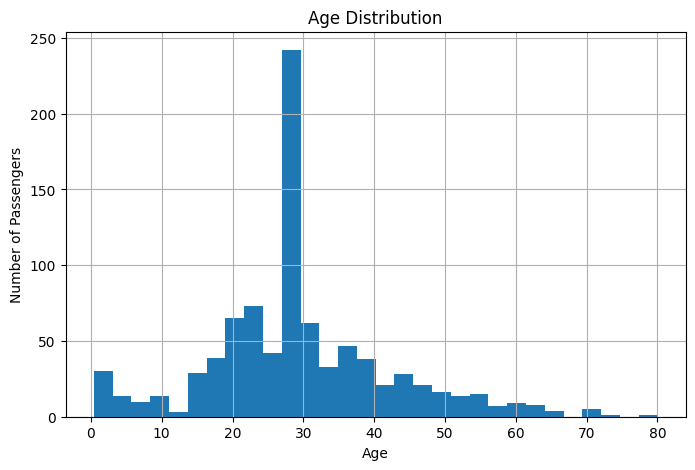

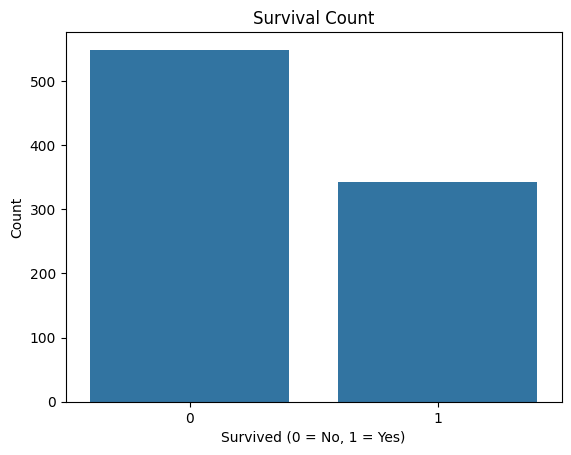

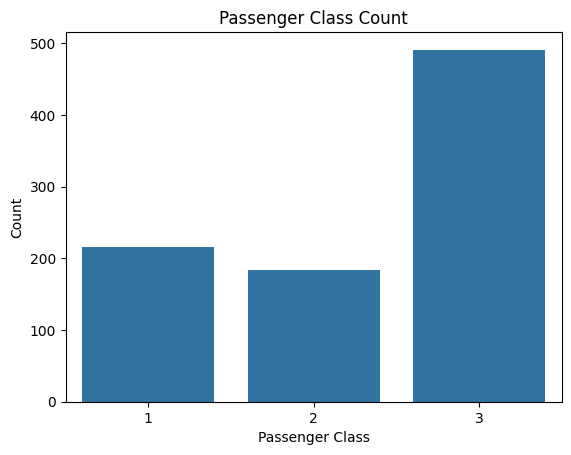

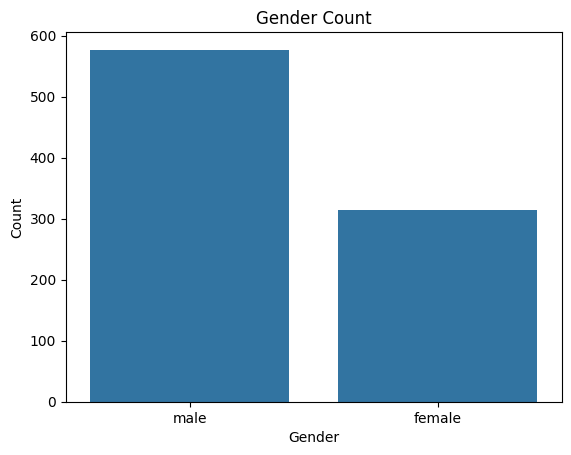

In [8]:
# Plotting the distribution of Age
plt.figure(figsize=(8,5))
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Plotting the survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Plotting passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plotting gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


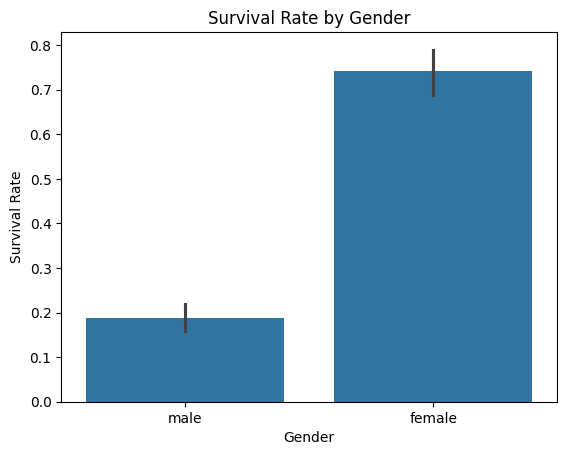

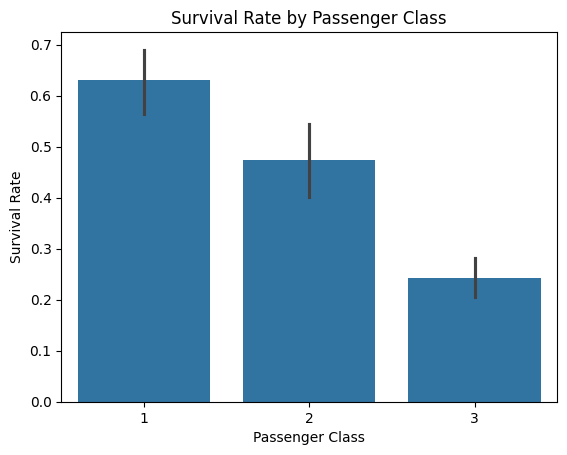

Text(0, 0.5, 'Age')

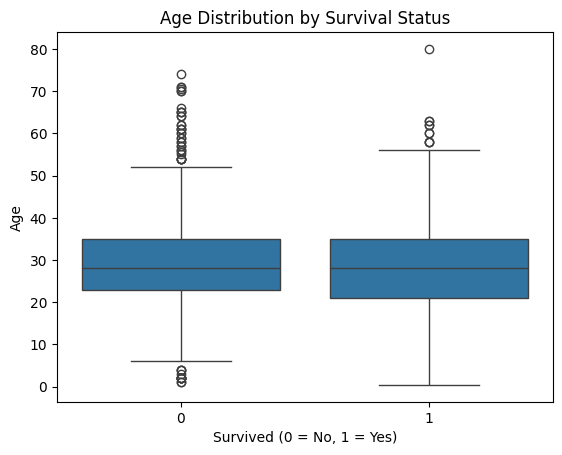

In [10]:
# Comparing survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Comparing survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Boxplot of Age vs Survival (Age distribution for each survival group)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')


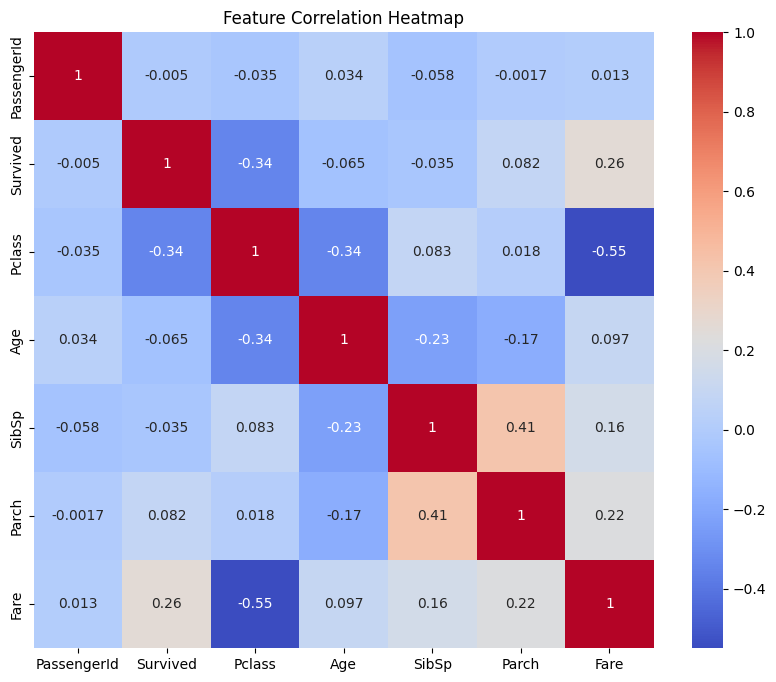

In [12]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plotting the heatmap for the correlation of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
